In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
%matplotlib inline

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [168]:
df1 = pd.read_csv("votes.txt")
df1 = df1.replace('y',1)
df1 = df1.replace('n',0)
df1 = df1.replace('?',np.nan)
df1 = df1.replace(np.nan, df1.mean())
df1['party'] = df1.party.replace('republican', 1)
df1['party'] = df1.party.replace('democrat', 0)

y, X = dmatrices('party ~ v1+v2+v3+v4+v5+v6+v7+v8+v9+v10+v11+v12+v13+v14+v15+v16', data=df1, return_type='matrix')

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [169]:
def model(name, main_model):
    model = main_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print name, "accuracy score:", accuracy_score(y_test, model.predict(x_test))
    print name, "classification report:"
    print classification_report(y_test, y_pred), "\n"

model("KNN", KNeighborsClassifier)
model("Logistic Regression", LogisticRegression)
model("Gaussian Naive Bayes", GaussianNB)
model("SVM Classifier", SVC)
model("Decision Tree", DecisionTreeClassifier)
model("Random Forest", RandomForestClassifier)

KNN accuracy score: 0.94495412844
KNN classification report:
             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96        71
        1.0       0.90      0.95      0.92        38

avg / total       0.95      0.94      0.95       109


Logistic Regression accuracy score: 0.954128440367
Logistic Regression classification report:
             precision    recall  f1-score   support

        0.0       0.97      0.96      0.96        71
        1.0       0.92      0.95      0.94        38

avg / total       0.95      0.95      0.95       109


Gaussian Naive Bayes accuracy score: 0.94495412844
Gaussian Naive Bayes classification report:
             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96        71
        1.0       0.90      0.95      0.92        38

avg / total       0.95      0.94      0.95       109


SVM Classifier accuracy score: 0.954128440367
SVM Classifier classification report:
             preci

#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

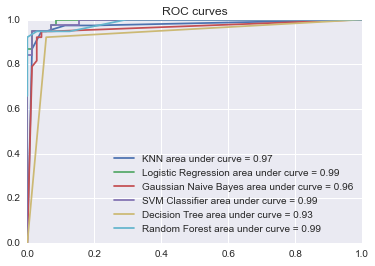

In [170]:
y = y.ravel()

def curves(name, classifier):
    probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = "%s area under curve = %0.2f" 
             % (name, roc_auc_score(y_test, probas_[:, 1])))
    plt.legend(loc = "best")
    plt.title("ROC curves")
    
curves("KNN", KNeighborsClassifier())
curves("Logistic Regression", LogisticRegression())
curves("Gaussian Naive Bayes", GaussianNB())
curves("SVM Classifier", SVC(probability = True))
curves("Decision Tree", DecisionTreeClassifier())
curves("Random Forest", RandomForestClassifier())

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [171]:
def cv_scores(name, main_model):
    accuracy = cross_val_score(main_model, X, y.ravel(), scoring = 'accuracy')
    precision = cross_val_score(main_model, X, y.ravel(), scoring = 'precision')
    recall = cross_val_score(main_model, X, y.ravel(), scoring = 'recall') 
    f1 = cross_val_score(main_model, X, y.ravel(), scoring = 'f1')
    print name, "scores:"
    print "\tAccuracy = ", accuracy.mean()
    print "\tPrecision = ", precision.mean()
    print "\tRecall = ", recall.mean()
    print "\tF1 = ", f1.mean()
    print "\n"

cv_scores("KNN", KNeighborsClassifier())
cv_scores("Logistic Regression", LogisticRegression())
cv_scores("Gaussian Naive Bayes", GaussianNB())
cv_scores("SVM Classifier", SVC())
cv_scores("Decision Tree", DecisionTreeClassifier())
cv_scores("Random Forest", RandomForestClassifier())

KNN scores:
	Accuracy =  0.933333333333
	Precision =  0.892538476524
	Recall =  0.940476190476
	F1 =  0.915836818433


Logistic Regression scores:
	Accuracy =  0.958620689655
	Precision =  0.943342348807
	Recall =  0.952380952381
	F1 =  0.947168147168


Gaussian Naive Bayes scores:
	Accuracy =  0.931034482759
	Precision =  0.908613247223
	Recall =  0.916666666667
	F1 =  0.911184814591


SVM Classifier scores:
	Accuracy =  0.954022988506
	Precision =  0.922270955166
	Recall =  0.964285714286
	F1 =  0.942183510572


Decision Tree scores:
	Accuracy =  0.944827586207
	Precision =  0.920445837687
	Recall =  0.952380952381
	F1 =  0.93859746446


Random Forest scores:
	Accuracy =  0.96091954023
	Precision =  0.940870695257
	Recall =  0.964285714286
	F1 =  0.937761607801




#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [172]:
df3 = pd.read_csv("2013_movies.csv")
df3['Runtime_bins'] = (df3.Runtime > 100).astype(int)
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Runtime_bins
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,0
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [173]:
y3, X3 = dmatrices('Runtime_bins ~ Rating', data=df3, return_type='matrix')

def movie_scores(name, main_model):
    precision = cross_val_score(main_model, X3, y3.ravel(), scoring = 'precision')
    recall = cross_val_score(main_model, X3, y3.ravel(), scoring = 'recall') 
    print name, "scores:"
    print "\tPrecision = ", precision.mean()
    print "\tRecall = ", recall.mean()
    print "\n"

movie_scores("KNN", KNeighborsClassifier())
movie_scores("Logistic Regression", LogisticRegression())
movie_scores("Gaussian Naive Bayes", GaussianNB())
movie_scores("SVM Classifier", SVC())
movie_scores("Decision Tree", DecisionTreeClassifier())
movie_scores("Random Forest", RandomForestClassifier())

KNN scores:
	Precision =  0.726150392817
	Recall =  0.913043478261


Logistic Regression scores:
	Precision =  0.692381329636
	Recall =  0.942028985507


Gaussian Naive Bayes scores:
	Precision =  0.741138988451
	Recall =  0.913043478261


SVM Classifier scores:
	Precision =  0.692381329636
	Recall =  0.942028985507


Decision Tree scores:
	Precision =  0.741138988451
	Recall =  0.913043478261


Random Forest scores:
	Precision =  0.741138988451
	Recall =  0.942028985507




#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [174]:
df4 = pd.read_csv("cancer.txt")
df4.survival_status = df4.survival_status.replace(2,0)
df4.head()

,age,year_of_op,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [175]:
y4, X4 = dmatrices('survival_status ~ age + year_of_op + pos_nodes', data=df4, return_type='matrix')
y4 = y4.ravel()

x_train4, x_test4, y_train4, y_test4 = train_test_split(
    X4, y4, test_size=0.25, random_state=7)

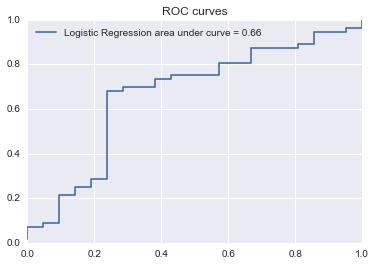

In [176]:
probas_ = LogisticRegression().fit(x_train4, y_train4).predict_proba(x_test4)
fpr, tpr, thresholds = roc_curve(y_test4, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "%s area under curve = %0.2f" 
         % ('Logistic Regression', roc_auc_score(y_test4, probas_[:, 1])))
plt.legend(loc = "best")
plt.title("ROC curves")
plt.show()